In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = torch.load('../data_storage/CNN_L8_N100.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[-0.0065,  0.2142, -0.2504],
                        [-0.2913,  0.1332, -0.2380],
                        [ 0.0396, -0.3293, -0.1374]]],
              
              
                      [[[ 0.2749,  0.3749, -0.2386],
                        [ 0.1003,  0.2851, -0.0729],
                        [ 0.2032,  0.4121,  0.3743]]],
              
              
                      [[[ 0.2495, -0.1371,  0.2168],
                        [ 0.3633,  0.0693,  0.2120],
                        [ 0.0441, -0.2473,  0.0320]]],
              
              
                      [[[ 0.1206, -0.2330, -0.0501],
                        [-0.0070,  0.2497,  0.3017],
                        [ 0.0203,  0.0419,  0.3608]]],
              
              
                      [[[ 0.0343,  0.2303,  0.3079],
                        [ 0.1484,  0.1508, -0.0586],
                        [ 0.0922,  0.3811, -0.2248]]]], device='cuda:0')),
             ('fc.0.weig

In [3]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[-0.0065,  0.2142, -0.2504],
          [-0.2913,  0.1332, -0.2380],
          [ 0.0396, -0.3293, -0.1374]]],


        [[[ 0.2749,  0.3749, -0.2386],
          [ 0.1003,  0.2851, -0.0729],
          [ 0.2032,  0.4121,  0.3743]]],


        [[[ 0.2495, -0.1371,  0.2168],
          [ 0.3633,  0.0693,  0.2120],
          [ 0.0441, -0.2473,  0.0320]]],


        [[[ 0.1206, -0.2330, -0.0501],
          [-0.0070,  0.2497,  0.3017],
          [ 0.0203,  0.0419,  0.3608]]],


        [[[ 0.0343,  0.2303,  0.3079],
          [ 0.1484,  0.1508, -0.0586],
          [ 0.0922,  0.3811, -0.2248]]]], device='cuda:0')

In [5]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.cpu().numpy()

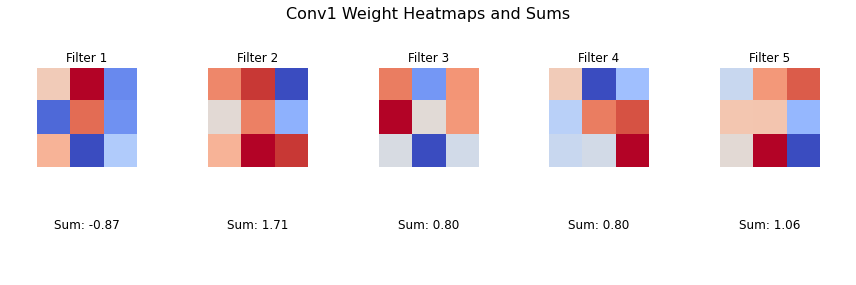

In [6]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='coolwarm', interpolation='nearest')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [7]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[ 1.0918e-02, -1.9528e-02,  8.0447e-06,  ...,  3.4604e-02,
          3.3232e-02,  5.3891e-02],
        [-1.4639e-01, -1.4874e-01,  3.5882e-02,  ..., -2.6625e-02,
          7.7779e-02, -9.2903e-02],
        [-1.2969e-01, -1.7232e-02, -8.6089e-02,  ..., -3.7196e-02,
         -1.1198e-01,  6.2374e-04],
        ...,
        [ 3.3737e-02, -2.4537e-02, -5.1311e-02,  ..., -8.1214e-02,
         -1.4837e-01, -1.5410e-01],
        [-4.8993e-03, -7.3148e-02, -1.0226e-01,  ..., -2.1299e-01,
         -6.1294e-02, -1.5730e-01],
        [ 8.8068e-02, -1.3993e-02,  9.8615e-02,  ..., -1.6273e-01,
         -1.5446e-01, -1.1814e-01]], device='cuda:0')

In [8]:
fc_weight.size()

torch.Size([100, 80])

In [10]:
# NumPy配列に変換
fc_weight_np = fc_weight.cpu().numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [11]:
fc_weight_np_square

array([[ 1.09182531e-02, -1.46388665e-01, -1.29686922e-01, ...,
         3.37371081e-02, -4.89931693e-03,  8.80682245e-02],
       [-1.95276178e-02, -1.48735210e-01, -1.72319487e-02, ...,
        -2.45367847e-02, -7.31480569e-02, -1.39934365e-02],
       [ 8.04471165e-06,  3.58816348e-02, -8.60893875e-02, ...,
        -5.13113961e-02, -1.02259658e-01,  9.86150429e-02],
       ...,
       [ 3.46038043e-02, -2.66248938e-02, -3.71960662e-02, ...,
        -8.12137127e-02, -2.12988466e-01, -1.62728891e-01],
       [ 3.32321264e-02,  7.77791440e-02, -1.11983210e-01, ...,
        -1.48368061e-01, -6.12938218e-02, -1.54463708e-01],
       [ 5.38908914e-02, -9.29032192e-02,  6.23736123e-04, ...,
        -1.54101476e-01, -1.57296121e-01, -1.18139468e-01]], dtype=float32)

In [12]:
fc_weight_np_square.shape

(80, 100)

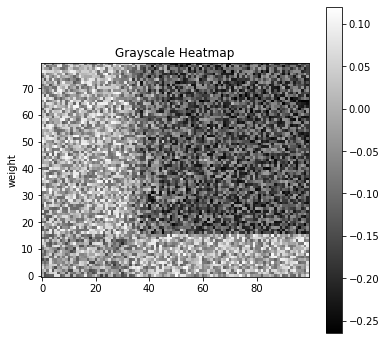

In [13]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [14]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([ -0.5264257 ,  -1.2983772 ,  -1.8116488 ,  -0.65067226,
        -2.0432892 ,  -0.90094924,  -0.8532182 ,  -1.0229816 ,
        -1.5565033 ,  -1.399774  ,  -1.1791373 ,  -1.7695003 ,
        -0.7055472 ,  -1.9950737 ,  -1.4718201 ,  -0.6494168 ,
        -0.66692674,  -0.821385  ,  -1.517334  ,  -1.1567945 ,
        -0.9296974 ,   0.02362267,  -1.1910484 ,  -0.88980305,
         0.34368783,  -0.6402137 ,  -0.5901754 ,  -1.7574048 ,
        -1.0248778 ,  -0.5121523 ,  -3.1721563 ,  -1.4974885 ,
        -1.9036528 ,  -3.1079907 ,  -4.8262196 ,  -3.9339092 ,
        -3.2918262 ,  -6.955429  ,  -6.9021177 ,  -4.5415134 ,
        -7.7011814 ,  -7.108984  ,  -6.0510054 ,  -4.559081  ,
        -8.009225  ,  -9.030352  ,  -7.0103197 ,  -8.307722  ,
        -8.782494  ,  -8.52928   ,  -8.106419  ,  -7.7775455 ,
        -8.486419  ,  -7.8290296 ,  -9.086388  ,  -7.9679112 ,
        -8.957575  ,  -9.01874   ,  -9.4412    ,  -8.295877  ,
        -9.080921  ,  -8.672179  ,  -7.982313  ,  -8.61

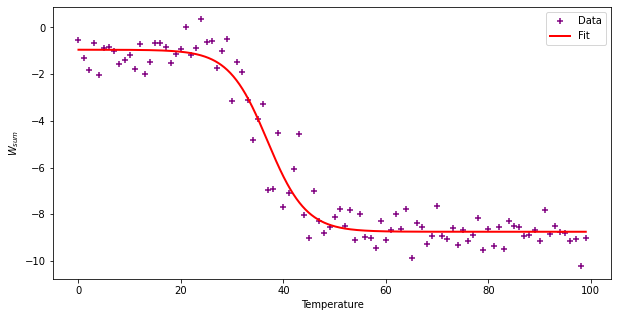

Fitted Parameters:
a: -3.8956936313512402
b: 0.13272689751255118
c: -4.8929154927564005
d: -4.851682566307623


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# フィッティング用のtanh関数
def tanh_function(x, a, b, c, d):
    return a * np.tanh(b * x + c) + d

# データ
x = np.arange(len(fc_weight_np_square_sum))
y = fc_weight_np_square_sum

# tanh関数の初期推定値
initial_guess = [1.0, 0.1, 0.0, 0.0]  # パラメータ a, b, c, d の初期推定値

# tanh関数のパラメータを推定
params, covariance = curve_fit(tanh_function, x, y, p0=initial_guess)

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple', label='Data')
plt.xlabel('Temperature')
plt.ylabel('$W_{sum}$')

# フィッティング結果をプロットに追加
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = tanh_function(x_fit, *params)
plt.plot(x_fit, y_fit, 'r-', label='Fit', linewidth=2)

plt.legend()
plt.show()

# フィッティングされたパラメータ
print("Fitted Parameters:")
print("a:", params[0])
print("b:", params[1])
print("c:", params[2])
print("d:", params[3])


相転移点の算出

In [24]:
center_x = -params[2] / params[1]
print("Fitted Center X:", center_x)

beta = (0.0080808080808081 * center_x) + 0.2
print("beta:", beta)

Fitted Center X: 36.86453600931723
beta: 0.49789524047933187
